### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [1]:
import numpy as np
#define the target function
def f(x,y): 
    return np.sin(x**2 + y**2)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#generate training and validation inputs
np.random.seed(0)
x_train = [np.random.uniform(-1.5, 1.5, 1000), np.random.uniform(-1.5, 1.5, 1000)]

x_valid = [np.random.uniform(-1.5, 1.5, 100), np.random.uniform(-1.5, 1.5, 100)]

f_target = f(x_valid[0],x_valid[1]) #ideal (target) function 

sigma = 0.05
f_train = np.random.normal(f(x_train[0],x_train[1]), sigma)
f_valid = np.random.normal(f(x_valid[0],x_valid[1]), sigma)

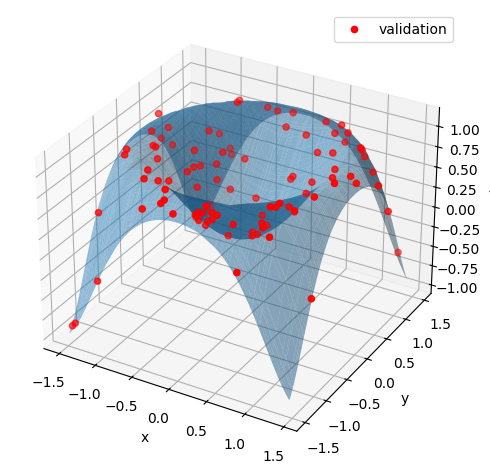

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Copia i dati di validazione per evitare modifiche
x_valid_copy = x_valid.copy()
f_valid_copy = f_valid.copy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dei dati di validazione
ax.scatter(x_valid_copy[0], x_valid_copy[1], f_valid_copy, c='r', label='validation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')

# Copia e ordina i dati per la griglia
X, Y = np.copy(x_valid_copy[0]), np.copy(x_valid_copy[1])
X.sort()
Y.sort()

X, Y = np.meshgrid(X, Y)
Z = f(X, Y)  # Z è equivalente a f_target ma è 2D

# Plot della superficie target
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()

model.add(Dense(75, input_shape=(2,),activation = 'tanh'))
model.add(Dense(64, input_shape=(2,),activation = 'relu'))
model.add(Dense(45, input_shape=(2,),activation = 'tanh'))
model.add(Dense(25, input_shape=(2,),activation = 'relu'))
model.add(Dense(1, input_shape=(2,)))

#compile the model
#opt = RMSprop(learning_rate=0.0001) 
#opt = Adam(learning_rate=0.0001) 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2024-06-03 17:28:14.552957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                225       
                                                                 
 dense_1 (Dense)             (None, 64)                4864      
                                                                 
 dense_2 (Dense)             (None, 45)                2925      
                                                                 
 dense_3 (Dense)             (None, 25)                1150      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 9,190
Trainable params: 9,190
Non-trainable params: 0
_________________________________________________________________


In [6]:
#fit the model
bat_size = 10
Nepoc = 50

# reshape train and validation data (1 array with 2 columns)
train_data = np.column_stack((x_train[0], x_train[1]))
valid_data = np.column_stack((x_valid[0], x_valid[1]))

history = model.fit(x=train_data, y=f_train, epochs=Nepoc, batch_size=bat_size, shuffle=True, validation_data=(valid_data, f_valid))

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.1818 - mse: 0.1818 - val_loss: 0.1702 - val_mse: 0.1702
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1428 - mse: 0.1428 - val_loss: 0.1625 - val_mse: 0.1625
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1360 - mse: 0.1360 - val_loss: 0.1605 - val_mse: 0.1605
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.1319 - mse: 0.1319 - val_loss: 0.1575 - val_mse: 0.1575
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1497 - val_mse: 0.1497
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.1239 - mse: 0.1239 - val_loss: 0.1429 - val_mse: 0.1429
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192 - val_loss: 0.1381 - val_mse: 0.1381
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.

In [7]:
# return weights and biases
#model.get_weights()

In [8]:
#evaluate model with respect to validation data
score = model.evaluate(valid_data, f_valid, batch_size=bat_size, verbose=1)
#print performance
print(score)

10/10 [==============================] - 0s 4ms/step - loss: 0.0051 - mse: 0.0051
[0.0051325601525604725, 0.0051325601525604725]


In [9]:
#evaluate model with respect to target data
score = model.evaluate(valid_data, f_target, batch_size=bat_size, verbose=1)
#print performance
print(score)

10/10 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
[0.0028366390615701675, 0.0028366390615701675]


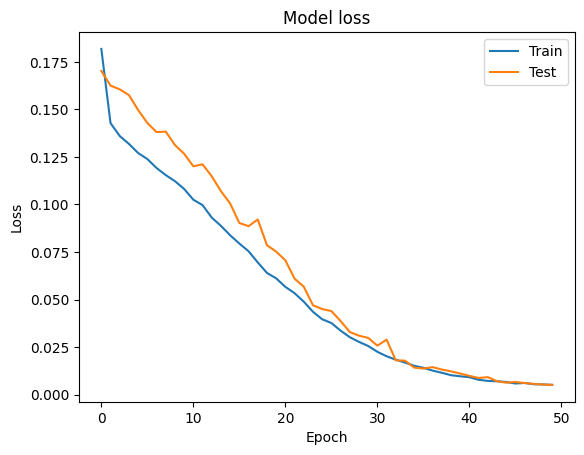

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Si verifica che la curva loss relativa al Test si trova, inizialmente, sopra quella di Train per poi andare a convergere al crescere del numero di epoche (come atteso). 

139/313 [============>.................] - ETA: 0s

/var/folders/v0/ld0stmms2v3br_fllmvmvvd80000gn/T/ipykernel_11084/4231879316.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right')


313/313 [==============================] - 0s 835us/step


/var/folders/v0/ld0stmms2v3br_fllmvmvvd80000gn/T/ipykernel_11084/4231879316.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right')


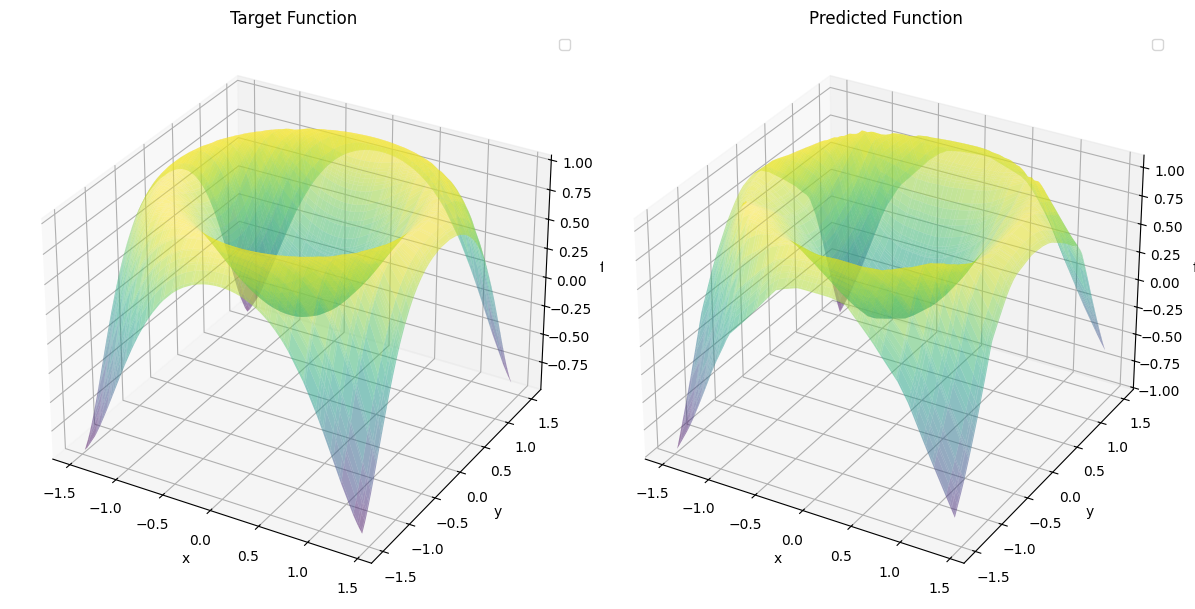

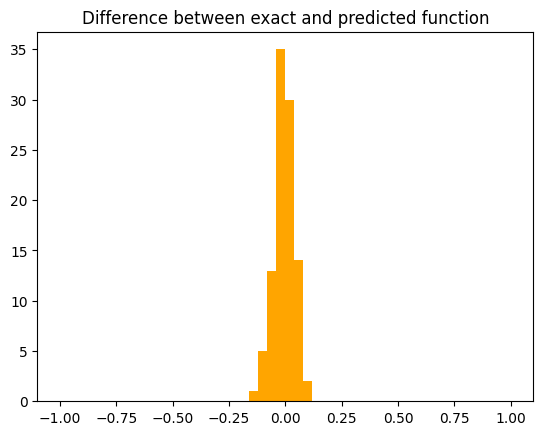

In [11]:

#generate predicted data
x_predicted = [np.random.uniform(-1.5, 1.5, 100), np.random.uniform(-1.5, 1.5, 100)]
predicted_data = np.column_stack((x_predicted[0], x_predicted[1]))


f_predicted = model.predict(predicted_data)


fig = plt.figure(figsize=(12, 6))

# primo grafico: funzione target
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f')

X, Y = np.copy(x_predicted[0]), np.copy(x_predicted[1])
X.sort()
Y.sort()
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5, cmap='viridis')
ax1.set_title('Target Function')

# Secondo grafico: funzione predetta
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Riordina predicted_data in modo da avere una griglia ordinata
predicted_data_sorted = np.column_stack((X.ravel(), Y.ravel()))
f_predicted_sorted = model.predict(predicted_data_sorted).reshape(X.shape)

ax2.plot_surface(X, Y, f_predicted_sorted, rstride=1, cstride=1, alpha=0.5, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f')
ax2.set_title('Predicted Function')

plt.tight_layout()
plt.show()

# Calcolo della differenza tra funzione esatta e predetta
f_exact = f(x_predicted[0], x_predicted[1])
diff = f_exact - f_predicted.ravel()

# Istogramma della differenza
plt.hist(diff, bins=50, range=[-1, 1], color='orange')
plt.title('Difference between exact and predicted function')
plt.show()

COMMENTI

La configurazione presentata è quella ritenuta migliore.

Le altre configurazioni osservate sono state:  
  - un diverso numero di layers nascosti (da 2 a 5);
  - diversi tipi di layers oltre a Dense (BatchNormalization e Dropout);
  - un numero diverso di neuroni: in generale, si è verificato che aumentando il numero di neuroni non necessariamente il 
    risultato migliora;
  - altre funzioni di attivazione: softmax e configurazioni con solo tanh o solo relu;
  - diversi tipi di ottimizzazione: rmsprop e adam (con diversi learning rates);
  - un diverso tipo di loss (mae).

E' stato costruito un istogramma che rappresenta la diffrenza tra i valori esatti e valori predetti dal modello. Nel caso della configurazione finalmente scelta, si nota la presenza di un picco soddisfacentemente stretto centrato in 0.